In [678]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import Q4_utilities as utils1
#reload the module if it has been changed
import importlib
import sys
importlib.reload(sys.modules['Q4_utilities'])

<module 'Q4_utilities' from 'c:\\Users\\Prakhar Gupta\\Prakhar\\College\\Semester 4\\Statistical Machine Learning\\Assignment_1\\Q4\\Q4_utilities.py'>

Sinosuidal wave parameters: frequency = 2.8615179000145847, amplitude = 0.3243535409536328, phase = 3.24968885160761


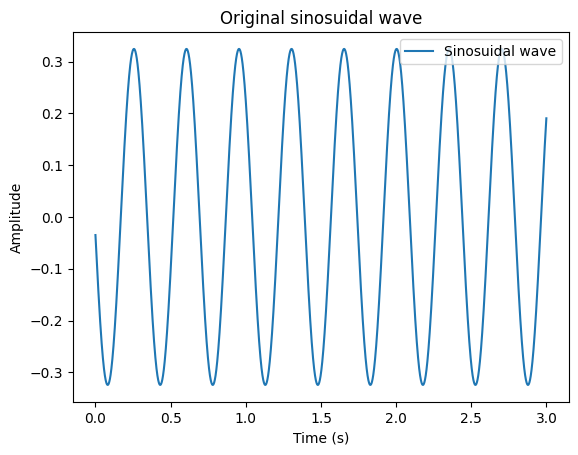

In [679]:
# Generate a random sinosuidal wave using utils1 module
# Generate random freqency, amplitude, phase
sinosuidal_frequency = 2.8615179000145847
sinosuidal_amplitude = 0.3243535409536328
sinosuidal_phase = 3.24968885160761
sinosuidal_duration = 3
sinosuidal_sample_rate = 1500
print('Sinosuidal wave parameters: frequency = {}, amplitude = {}, phase = {}'.format(sinosuidal_frequency, sinosuidal_amplitude, sinosuidal_phase))

# Generate a time vector
time = np.linspace(0, sinosuidal_duration, 4500, endpoint=False)
# Using utils1 module to generate a sinosuidal wave
sinosuidal_waveform = utils1.sinosuidal_wave_generation(sinosuidal_amplitude,sinosuidal_frequency,sinosuidal_phase, time)
# Plotting the original sinosuidal wave
plt.plot(time, sinosuidal_waveform)
plt.title('Original sinosuidal wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Sinosuidal wave'], loc='upper right')
plt.show()


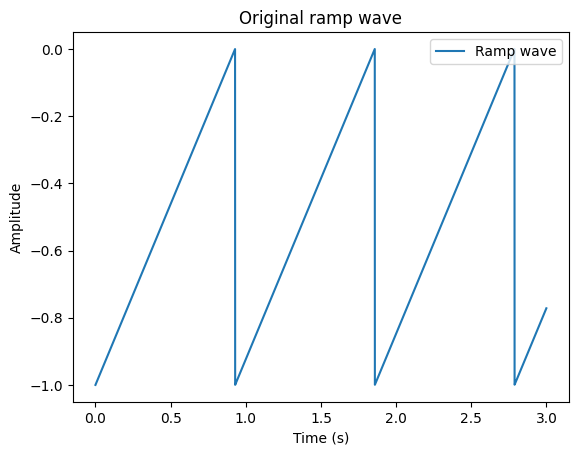

In [680]:
# Generate a random ramp wave using utils1 module
# Setting a random period for the ramp wave
ramp_period = 0.9291529393733632
# Using utils1 module to generate a ramp wave
ramp_waveform = utils1.ramp_wave_generation(time, ramp_period)
# Plotting the original ramp wave
plt.plot(time, ramp_waveform)
plt.title('Original ramp wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Ramp wave'], loc='upper right')
plt.show()


In [681]:
#construct a matrix which is the has the vectors of the two signals as its columns
# using utils1 module to combine the two vectors
signal_matrix = utils1.combine_vectors(sinosuidal_waveform, ramp_waveform)
# define a mixing matrix
mixing_matrix = np.array([[0.5,1],
                          [1,0.5]])
# mixing the two signals
mixed_signal = np.matmul(signal_matrix, mixing_matrix)
mixed_signal = mixed_signal.T
mixed_signal_1 = mixed_signal[0,:]
mixed_signal_2 = mixed_signal[1,:]

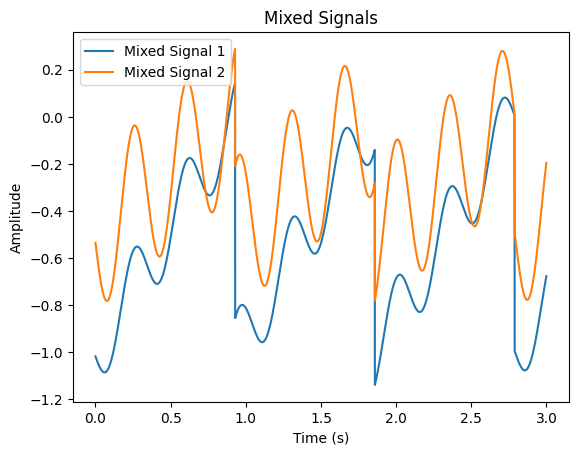

In [682]:
# Plot the mixed signals
plt.plot(time, mixed_signal_1)
plt.plot(time, mixed_signal_2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Mixed Signal 1', 'Mixed Signal 2'])
plt.title('Mixed Signals')
plt.show()

In [683]:
# Center signals
X = mixed_signal

Xc, meanX = utils1.center_vector(X)

# Whiten mixed signals
Xw, whiteM = utils1.whitening(Xc)

[[0.10510541 0.0754813 ]
 [0.0754813  0.07852838]]


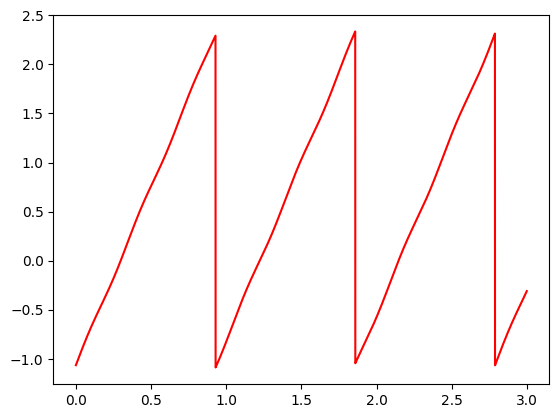

In [684]:
W = utils1.fastIca(Xw,  alpha=1)

#Un-mix signals using
unMixed = Xw.T.dot(W.T)
# Subtract mean
unMixed = (unMixed.T - meanX).T
#now we have the unMixed signals
unmixed_signalA = unMixed[:,0]
unmixed_signalB = unMixed[:,1]
#plot the unmixed signals
plt.plot(time, unmixed_signalA, color='red')
plt.show()


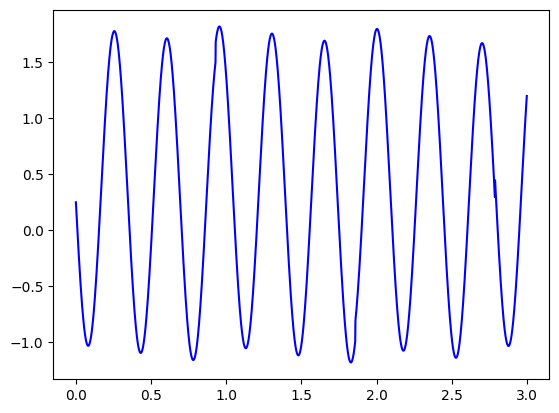

In [685]:
plt.plot(time, unmixed_signalB, color='blue')
plt.show()